In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import cv2
import matplotlib.pyplot as plt

In [3]:
# Carregar os dados MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar os dados de entrada
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ajustar o formato para incluir o canal (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Converter as labels para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2


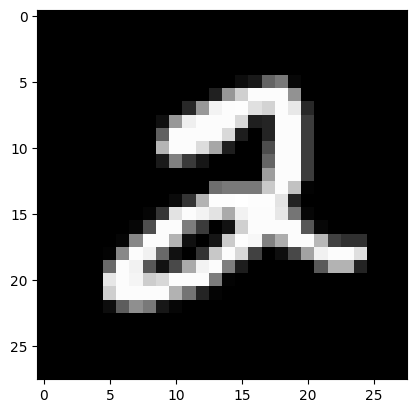

In [10]:
i = 5
plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
print(y_train[i], np.argmax(y_train[i]))

In [10]:
model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8944 - loss: 0.3343 - val_accuracy: 0.9789 - val_loss: 0.0705
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9814 - loss: 0.0556 - val_accuracy: 0.9844 - val_loss: 0.0532
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9920 - loss: 0.0223 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.9894 - val_loss: 0.0409
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9894 - val_loss: 0.0399
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9963 - loss: 0.0104 - val_accuracy: 0.9896 - val_loss: 0.0399
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9974 -

In [12]:
# Avaliar o modelo
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0436


[0.03565783426165581, 0.9909999966621399]

In [13]:
path = "modelos"
os.makedirs(path, exist_ok=True)
model.save(os.path.join(path, "last.h5"))